# Data Science Project: Individual Planning Stage 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Description

#### Reading in the data

In [2]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### Variable Breakdown

As seen above, the players dataset contains 196 observations and 7 variables. Each variable can be broken down in the following manner:

1. **experience**: Categorical variable; Minecraft experience level 

2. **subscribe**: Categorical variable; lack or presence of subscription to a game-related newsletter

3. **hasedEmail**: Identifier variable; unique identifier for player's email

4. **played_hours**: Quantitative variable; total hours spent playing Minecraft 

5. **name**: Identifier variable; player's name

6. **gender**: Categorical variable; player's gender

7. **Age**: Quantitative variable; player's age

#### Summary Statistics

In [3]:
summary_stats <- summary(players)
summary_stats

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

As seen above, no values are missing for both the identifier and categorical variables. However, when it comes to the categorical variables, they are encoded as characters when they should be encoded as factors, except for the subscribe variable, which is properly encoded as a logical. Let's fix this:

In [4]:
players <- players |>
    mutate(experience = as.factor(experience),
           gender = as.factor(gender))

summary(players)

    experience subscribe       hashedEmail         played_hours    
 Amateur :63   Mode :logical   Length:196         Min.   :  0.000  
 Beginner:35   FALSE:52        Class :character   1st Qu.:  0.000  
 Pro     :14   TRUE :144       Mode  :character   Median :  0.100  
 Regular :36                                      Mean   :  5.846  
 Veteran :48                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
     name                         gender         Age       
 Length:196         Agender          :  2   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Male             :124   Median :19.00  
                    Non-binary       : 15   Mean   :21.14  
                    Other            :  1   3rd Qu.:22.75  
                    Prefer not to say: 11   Max.   :58.00  
                    Two-Spirited    

Now that the categorical variables are properly encoded, we can observe the counts for each category. This gives us the following modes:

1. experience: Amateur (63)
2. subscribe: TRUE (144)
3. gender: Male (124)

For the three categorical variables, we observe imbalance issues across categories. Firstly, though the experience variable seems roughly balanced across its categories, we see that the pro category is severely underrepresented. This seems to make sense, since fewer players will naturally have high experience levels, but the veteran level, being a level higher than pro, has a much higher count. Secondly, the TRUE category is severely overrepresented in the subscribe variable, leading to class imbalance in what seems to be the natural target variable for the players dataset. Thirdly, in the gender variable, the male category is also severely overrepresented. All these imbalances across categories lead to a less representative dataset, which could lead to a biased model.

As for the quantitative variables, we also see some issues. Notably, the played_hours variable has a low spread, with an IQR equal to 0.6. Yet, its mean is significantly higher than its median, with a difference of 5.746. This suggests that the distribution for the played_hours variable is skewed to the right and likely contains severe outliers. This issue is further accentuated by the maximum value of 223.100 hours, which very drastically drifts away from the upper percentile of 0.6 hours. Then, the age variable also has a low spread, with an IQR of 5.75. The distribution for this variable seems to be skewed to the right as well, due to having a higher mean than median, specifically by 2.14. Yet, this suggests a skewness not as drastic as for the played_hours variable, which is further reinforced by the lower difference between the maximum value and upper percentile (15.25). However, it is worth noting that the age variable has 2 missing values, which makes imputing or removal of the appropriate rows necessary before model-building.  

## Questions

For this project, I'll be addressing the following broad question: 

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

Which then leads me to formulate the following more specific question:

**Can experience, hours played, gender, and age predict subscription to a game-related newsletter in the players dataset?**

The players dataset directly helps me address both questions since it provides data that captures the experience, gaming habits, and demographics of players. More specifically, experience and played_hours reflect how engaged a player is with the game, which may influence their interest in receiving news and updates, while age provides context that could relate to communication preferences. Then, gender, experience, and age, when taken together, could help reveal different player groups. Finally, the dataset provides observations that can then be used to train a model that predicts whether or not a player subscribes to a game-related newsletter.

Nonetheless, it is also crucial to ensure the variables can be properly used to train a predictive model. On one hand, the quantitative variables named in my specific question, namely hours played and age, are very valuable assets and easier to work with due to their numeric nature. Thus, any model that requires numerical operations to be performed on the values of these variables, which is the case for many models, will not encounter any problems. 

On the other hand, the categorical variables mentioned in my specific question, namely experience and gender, will be harder to work with. Since they are not encoded in numbers, any model that I choose must be able to work with characters, yet I have not studied such models yet. However, the solution to this problem is to generate a numerical encoding for these variables, which, fortunately, results quite intuitive. The experience variable can be given the following ordinal encoding, since experience is hierarchical: 

**Beginner(0) -> Amateur(1) -> Regular(2) -> Pro(3) -> Veteran(4)**

Then, for the gender variable, I can create dummy variables for each gender category.

## Exploratory Data Analysis and Visualization

The means of the quantitative variables in the players dataset are the following:

In [5]:
means_quant_vars <- players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE)

means_quant_vars

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


I will also provide the following visualizations of the distribution of the predictors and the target variable, for context, yet will provide no further explanation about them since my observations would be the same as the ones I did on the Data Description section:

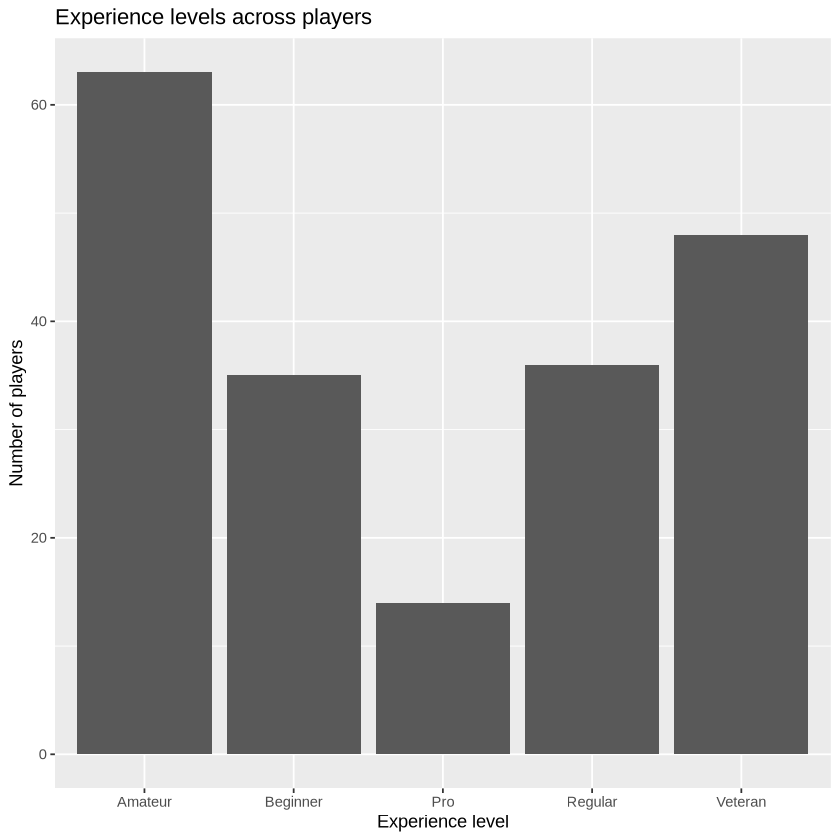

In [6]:
experience_bar_plot <- players |>
    ggplot(aes(x = experience)) + geom_bar() + xlab("Experience level") + ylab("Number of players") +
    ggtitle("Experience levels across players")

experience_bar_plot

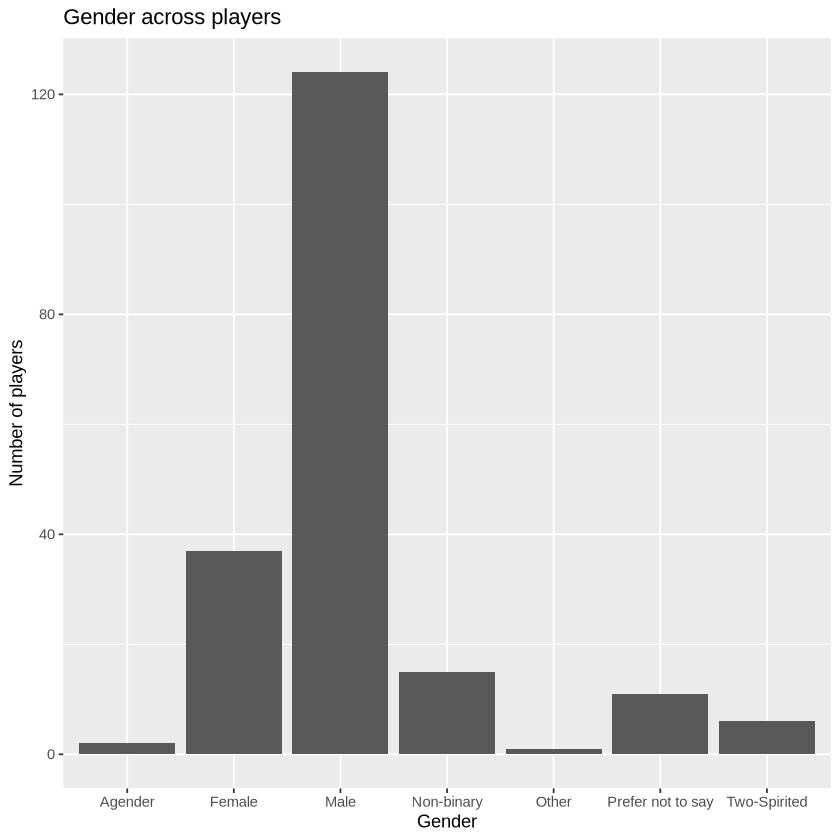

In [7]:
gender_bar_plot <- players |>
    ggplot(aes(x = gender)) + geom_bar() + xlab("Gender") + ylab("Number of players") +
    ggtitle("Gender across players")

gender_bar_plot

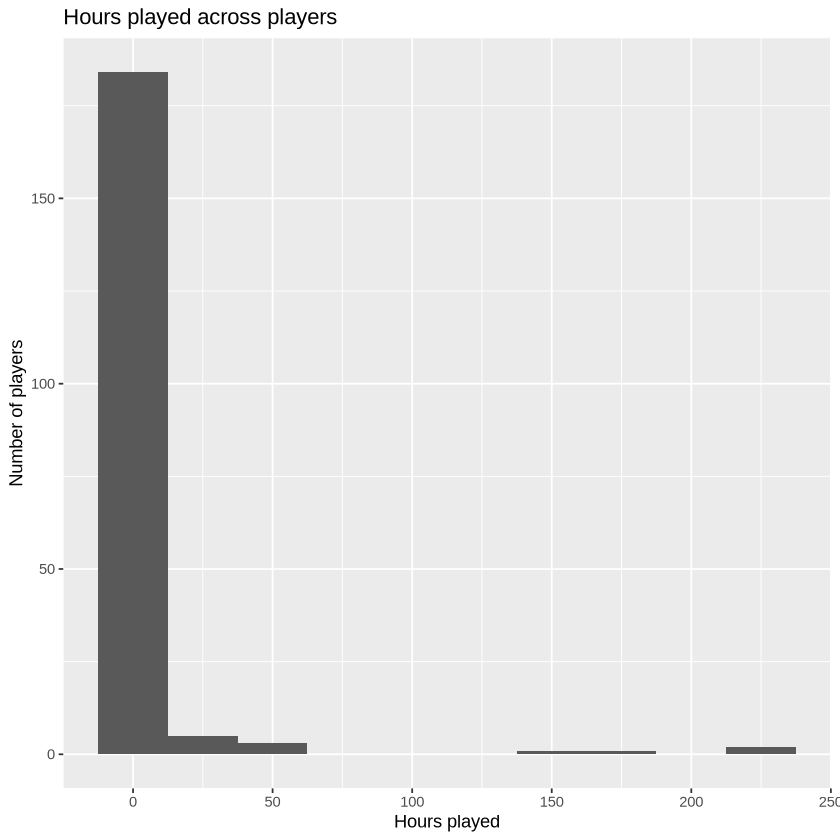

In [8]:
played_hours_hist <- players |>
    ggplot(aes(x = played_hours)) + geom_histogram(binwidth = 25) + 
    xlab("Hours played") + ylab("Number of players") +
    ggtitle("Hours played across players")
played_hours_hist

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


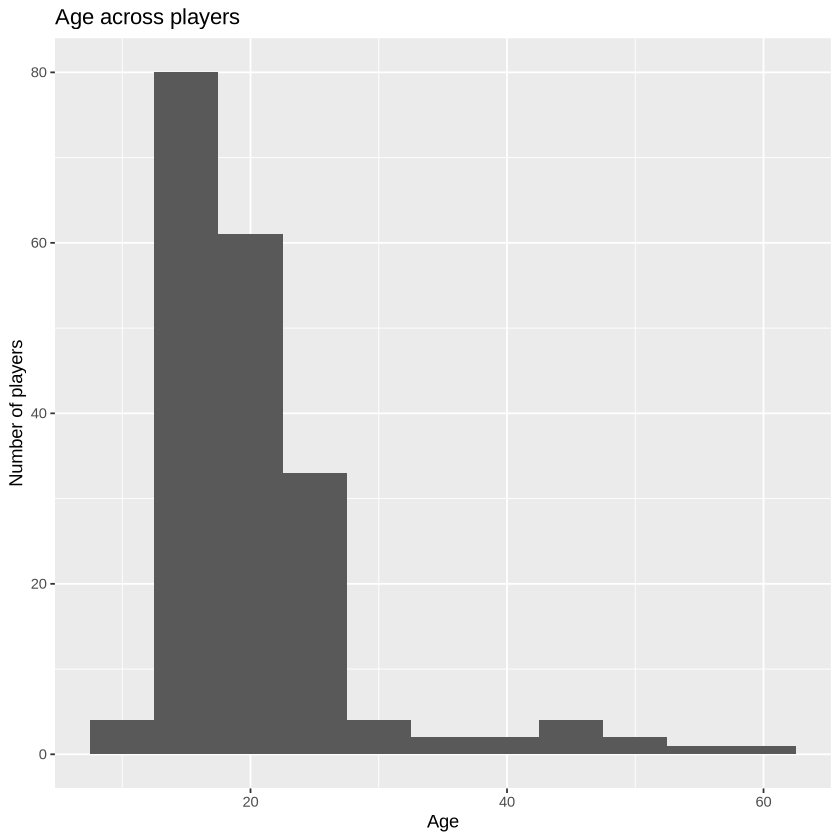

In [9]:
age_hist <- players |>
    ggplot(aes(x = Age)) + geom_histogram(binwidth = 5) + 
    xlab("Age") + ylab("Number of players") +
    ggtitle("Age across players")
age_hist

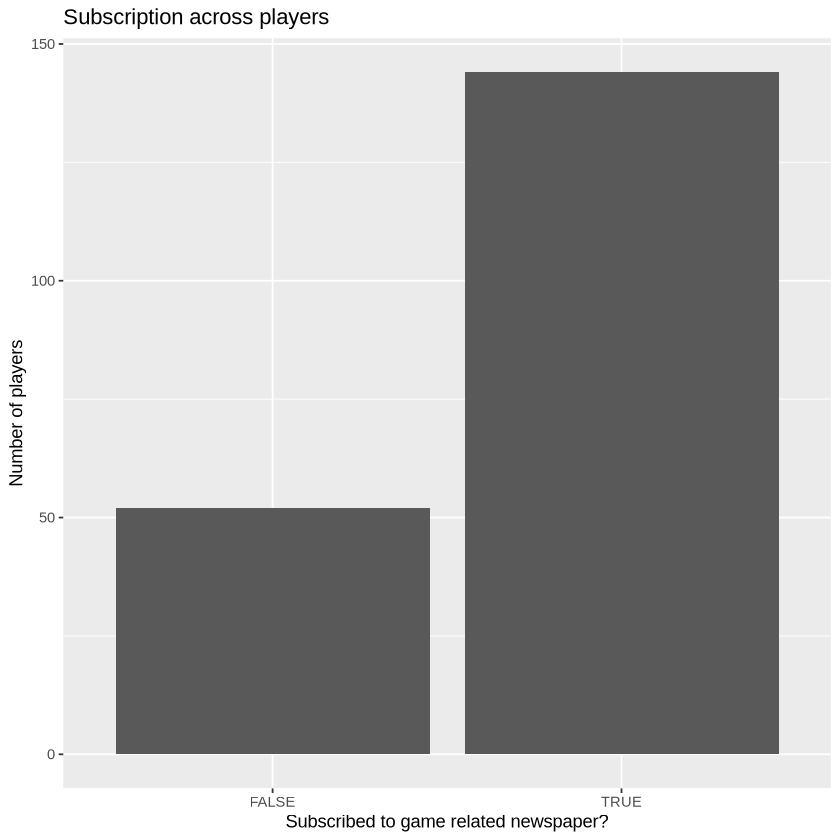

In [10]:
subscribe_bar_plot <- players |>
    ggplot(aes(x = subscribe)) + geom_bar() + 
    xlab("Subscribed to game related newspaper?") + 
    ylab("Number of players") +
    ggtitle("Subscription across players")

subscribe_bar_plot

Now, in order to examine whether experience, hours played, gender, and age are related to subscription to a game-related newsletter, I explored how each of these variables differs between subscribed and non-subscribed players with the following visualizations:

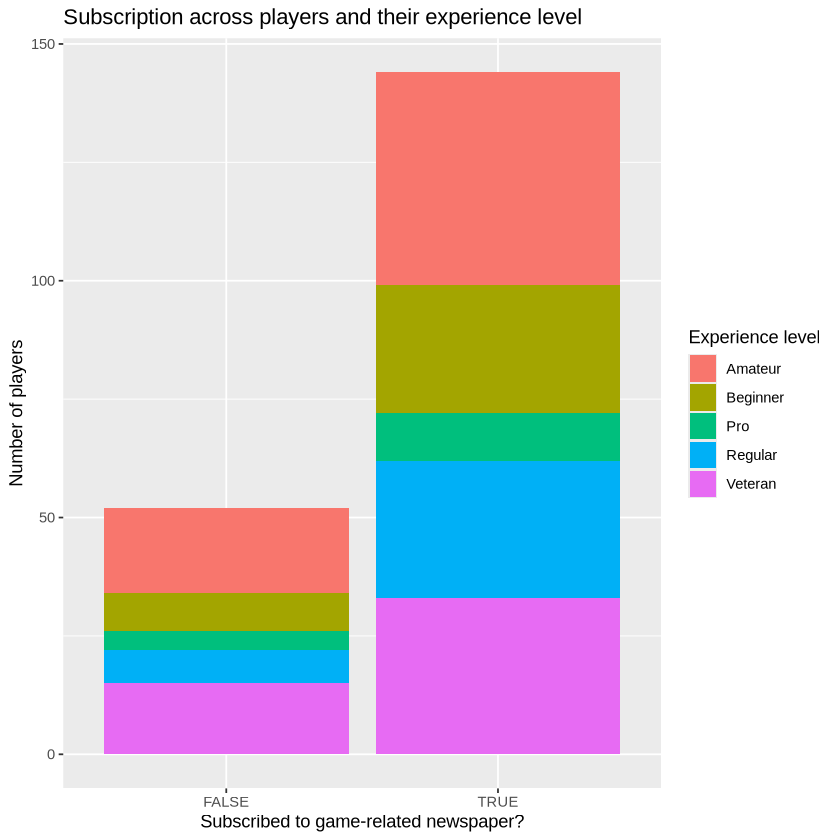

In [11]:
subscribe_exp_bar_plot <- players |>
    ggplot(aes(x = subscribe, fill = experience)) + geom_bar() + 
    xlab("Subscribed to game-related newspaper?") + ylab("Number of players") +
    labs(fill = "Experience level") +
    ggtitle("Subscription across players and their experience level")

subscribe_exp_bar_plot

As seen above, the distribution of experience levels accross both the subscribed and non-subscribed groups seem somewhat similar. However, we can see that in the subscribed group, the proportion of regular and beginner players is notably higher, even reaching similar levels to the proportions of veteran and amateur players. This may be due to initial excitement and interest in gaming, and suggests potential for predicting the subscribed variable. The proportions of veteran, pro, and amateur players, though, are similar in both the subscribed and non-subscribed groups, which indicates that the predictive power of the experience level variable weakens beyond the regular category, rendering it a moderate predictive power instead of a strong one. 

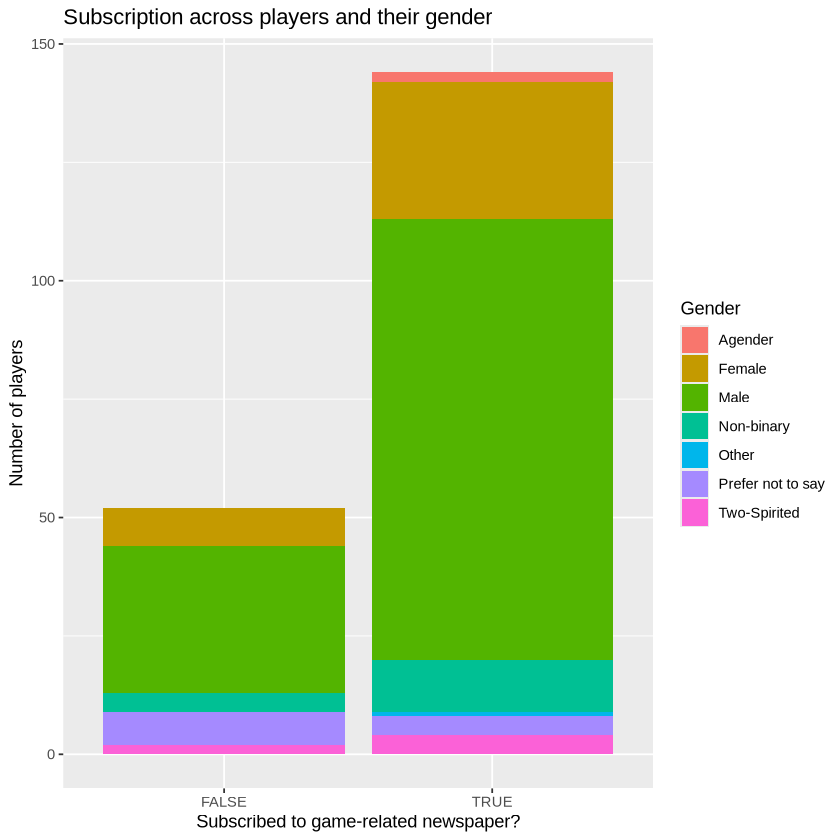

In [12]:
subscribe_gender_bar_plot <- players |>
    ggplot(aes(x = subscribe, fill = gender)) + geom_bar() + 
    xlab("Subscribed to game-related newspaper?") + ylab("Number of players") +
    labs(fill = "Gender") +
    ggtitle("Subscription across players and their gender")

subscribe_gender_bar_plot

As seen above, the distribution of gender in both the subscribed and non-subscribed groups seems very similar, with the exception of larger presence of agender players in the subscription players. Thus, the predictive power of the gender variable seems weak, yet it can still be worth it to keep this variable due to how it may relate to other variables in the dataset, as well as how helpful it is in defining groups of players. 

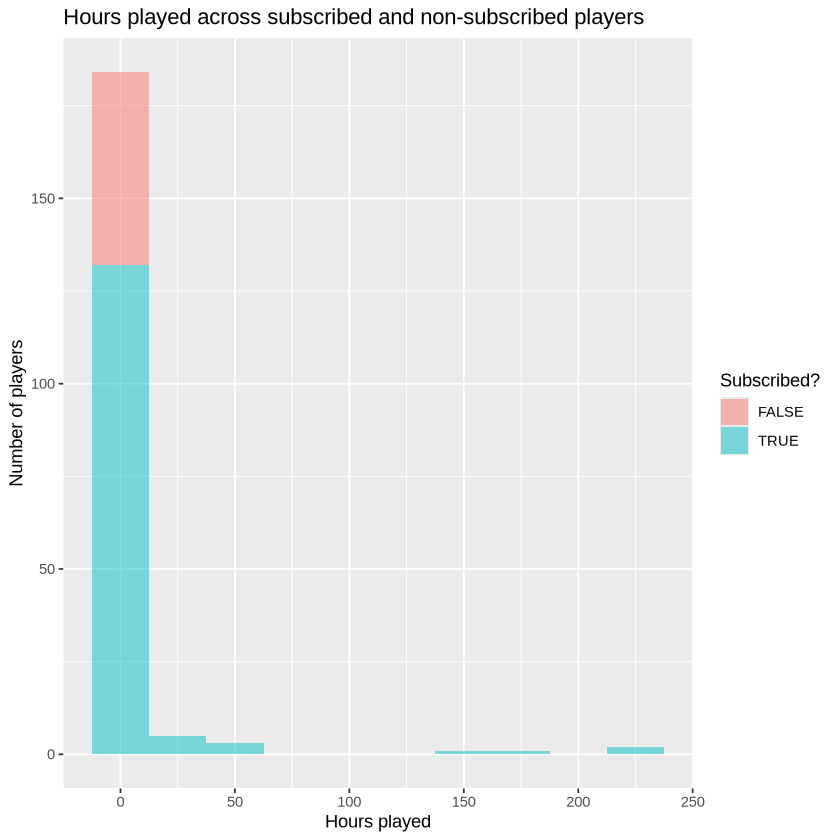

In [13]:
played_hours_subscribe_hist <- players |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(alpha = 0.5, binwidth = 25) + 
    xlab("Hours played") + ylab("Number of players") +
    ggtitle("Hours played across subscribed and non-subscribed players") + 
    labs(fill = "Subscribed?")

played_hours_subscribe_hist

As for the played_hours variable, it does seem to have strong potential for predictive power, given that the subscribed group, unlike the non-subscribed group, shows cases of players that have played very high numbers of hours. While these cases are the minority, the fact that they are present at all in the subscribed group and absent in the non-subscribed group suggests that unusually high playing time is perhaps one of the things that separate subscribed players from non-subscribed ones.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


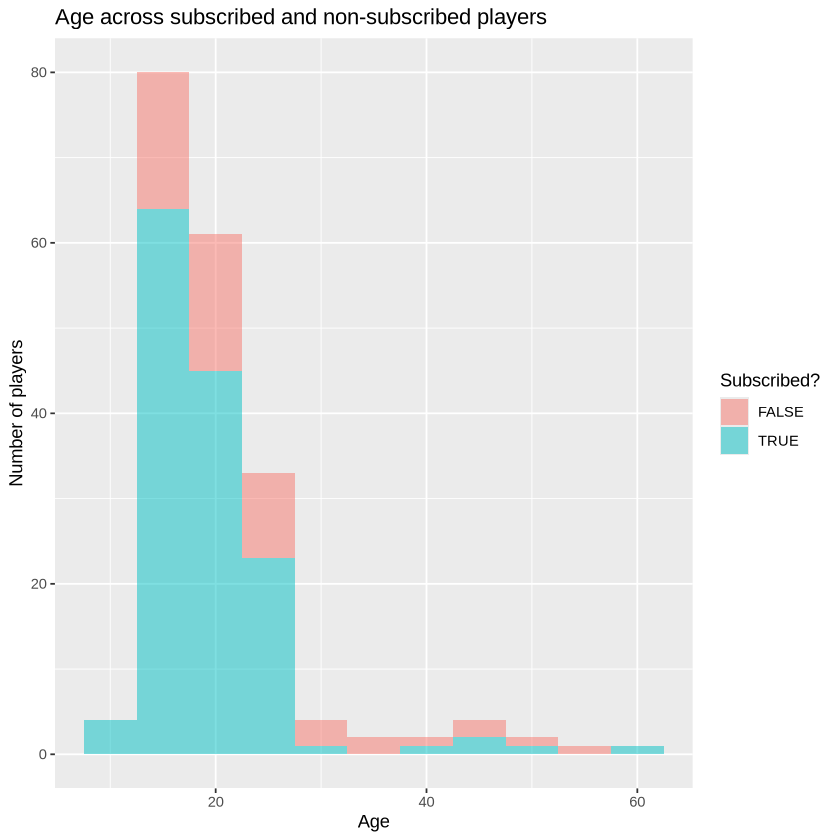

In [14]:
age_subscribe_hist <- players |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(alpha = 0.5, binwidth = 5) + 
    xlab("Age") + ylab("Number of players") +
    ggtitle("Age across subscribed and non-subscribed players") +
    labs(fill = "Subscribed?")

age_subscribe_hist

As for the age variable, it also does seem to have strong potential for predictive power. This is because the non-subscribed group displays a higher number of older players than the subscribed group, which therefore suggests that the subscribed group consists of a younger demographic. This could be because younger generations prefer electronic channels of communication and news.

## Methods and Plan